In [1]:
import pandas as pd

# importing data

In [2]:
df = pd.read_csv('world_happiness_dataset.csv', header=[0])

In [4]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [13]:
len(df)

158

In [14]:
len(df.Country.unique()) # Every row has a unique country

158

In [6]:
"""
Regression Problem : To find the score for each country based upon different attributes.
"""

'\nRegression Problem : To find the score for each country based upon different attributes.\n'

# EDA

## Data Quality

In [7]:
df.isna().sum() # there are no missing values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Univariant and Multivariant Analysis

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [10]:
profile.to_notebook_iframe() # profile report, click below

# Data Cleaning

In [12]:
# there are no missing values, but we need to find skewness and outliers since there are some numerical variables

In [15]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

C:\Users\Nayan\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nayan\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nayan\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

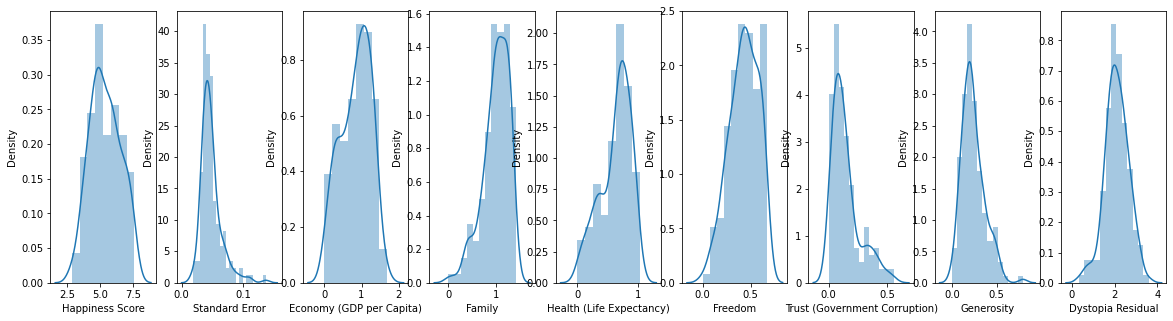

In [31]:
fig, axes = plt.subplots(ncols=9, figsize =(20,5))
for ax, col in zip(axes, ['Happiness Score',
                           'Standard Error', 'Economy (GDP per Capita)', 'Family',
                           'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                           'Generosity', 'Dystopia Residual']):
    sns.distplot(df[col], ax=ax)

plt.show()

In [30]:
#It seems there is no such skewness to take care of. The distribution of all numerical are close to normal.

# Feature Engineering

In [32]:
# Do not see any possibility of doing feature engineering

# Encoding

In [33]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [37]:
#Only Region is categorical variable
df['Region']= label_encoder.fit_transform(df['Region'])

In [38]:
df.head()

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland       9               1            7.587         0.03411   
1      Iceland       9               2            7.561         0.04884   
2      Denmark       9               3            7.527         0.03328   
3       Norway       9               4            7.522         0.03880   
4       Canada       5               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

In [173]:
#df["cap_shape"] = df["cap_shape"].map({"x":1,"b":2,"s":3,"f":4,"k":5,"c":6})

# Separate Independent Variable and Target Variable

In [43]:
Y = df.iloc[:,3:4] # iloc is marking the required columns with the index number, here all the rows are required from toxicity column

In [44]:
In = df.loc[:,['Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]

In [45]:
Y.head()

Happiness Score
0            7.587
1            7.561
2            7.527
3            7.522
4            7.427

In [46]:
In.head()

Region  Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  \
0       9               1         0.03411                   1.39651  1.34951   
1       9               2         0.04884                   1.30232  1.40223   
2       9               3         0.03328                   1.32548  1.36058   
3       9               4         0.03880                   1.45900  1.33095   
4       5               5         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

# Scaling

In [47]:
scaler = preprocessing.MinMaxScaler()

In [49]:
In[["Region"]] = scaler.fit_transform(X=In[["Region"]])

In [51]:
In.head()

Region  Happiness Rank  Standard Error  Economy (GDP per Capita)  \
0  1.000000               1         0.03411                   1.39651   
1  1.000000               2         0.04884                   1.30232   
2  1.000000               3         0.03328                   1.32548   
3  1.000000               4         0.03880                   1.45900   
4  0.555556               5         0.03553                   1.32629   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  1.34951                   0.94143  0.66557                        0.41978   
1  1.40223                   0.94784  0.62877                        0.14145   
2  1.36058                   0.87464  0.64938                        0.48357   
3  1.33095                   0.88521  0.66973                        0.36503   
4  1.32261                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

# PCA

In [52]:
# PCA is not needed here

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(In, Y, test_size=0.33)

# Modeling

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [56]:
LR = LinearRegression() # Model Creation
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor()

In [57]:
LR.fit(X_train,Y_train) # Model Training
KNR.fit(X_train,Y_train)
RFR.fit(X_train,Y_train)

C:\Users\Nayan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [58]:
LR_Result = LR.predict(X_test) # Model Prediction
KNR_Result = KNR.predict(X_test)
RFR_Result = RFR.predict(X_test)

# Evaluation Matrix and Cross Validation

## Mean Absolute Error

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
mean_absolute_error(Y_test, LR_Result) #Linear Regression

0.00025667350752955057

In [61]:
mean_absolute_error(Y_test, KNR_Result) #KNR

0.05445660377358484

In [62]:
mean_absolute_error(Y_test, RFR_Result) #Random Forest Regressor

0.07298188679245313

## Mean Squared Error

In [63]:
from sklearn.metrics import mean_squared_error


In [64]:
mean_squared_error(Y_test, LR_Result) #LR

8.889181793776422e-08

In [65]:
mean_squared_error(Y_test, KNR_Result) #KNR

0.016067132830188676

In [66]:
mean_squared_error(Y_test, RFR_Result) #RFR

0.026512451452830224

## R^2 Score

In [67]:
from sklearn.metrics import r2_score


In [68]:
r2_score(Y_test, LR_Result) #LR

0.9999999437978386

In [69]:
r2_score(Y_test, KNR_Result) #svm

0.9898414993372041

In [70]:
r2_score(Y_test, RFR_Result) #RFR

0.9832374102770919

## Cross Validation

In [71]:
from sklearn import model_selection

In [72]:
models = []

models.append(('LR', LinearRegression()))

models.append(('KNR', KNeighborsRegressor()))

models.append(('RFR', RandomForestRegressor()))


In [73]:
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, In, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.999992 (0.000008)


C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNR: -1.063267 (1.889347)


C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Nayan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed

RFR: -1.477518 (1.836459)


In [74]:
# Based upon cross validation Linear Regression is the best model

## Grid Search

In [219]:
# We do not need grid search for Linear Regression model

# Saving the model

In [75]:
import pickle

In [76]:
filename = 'linear_regressor_model.sav'
pickle.dump(LR, open(filename, 'wb'))